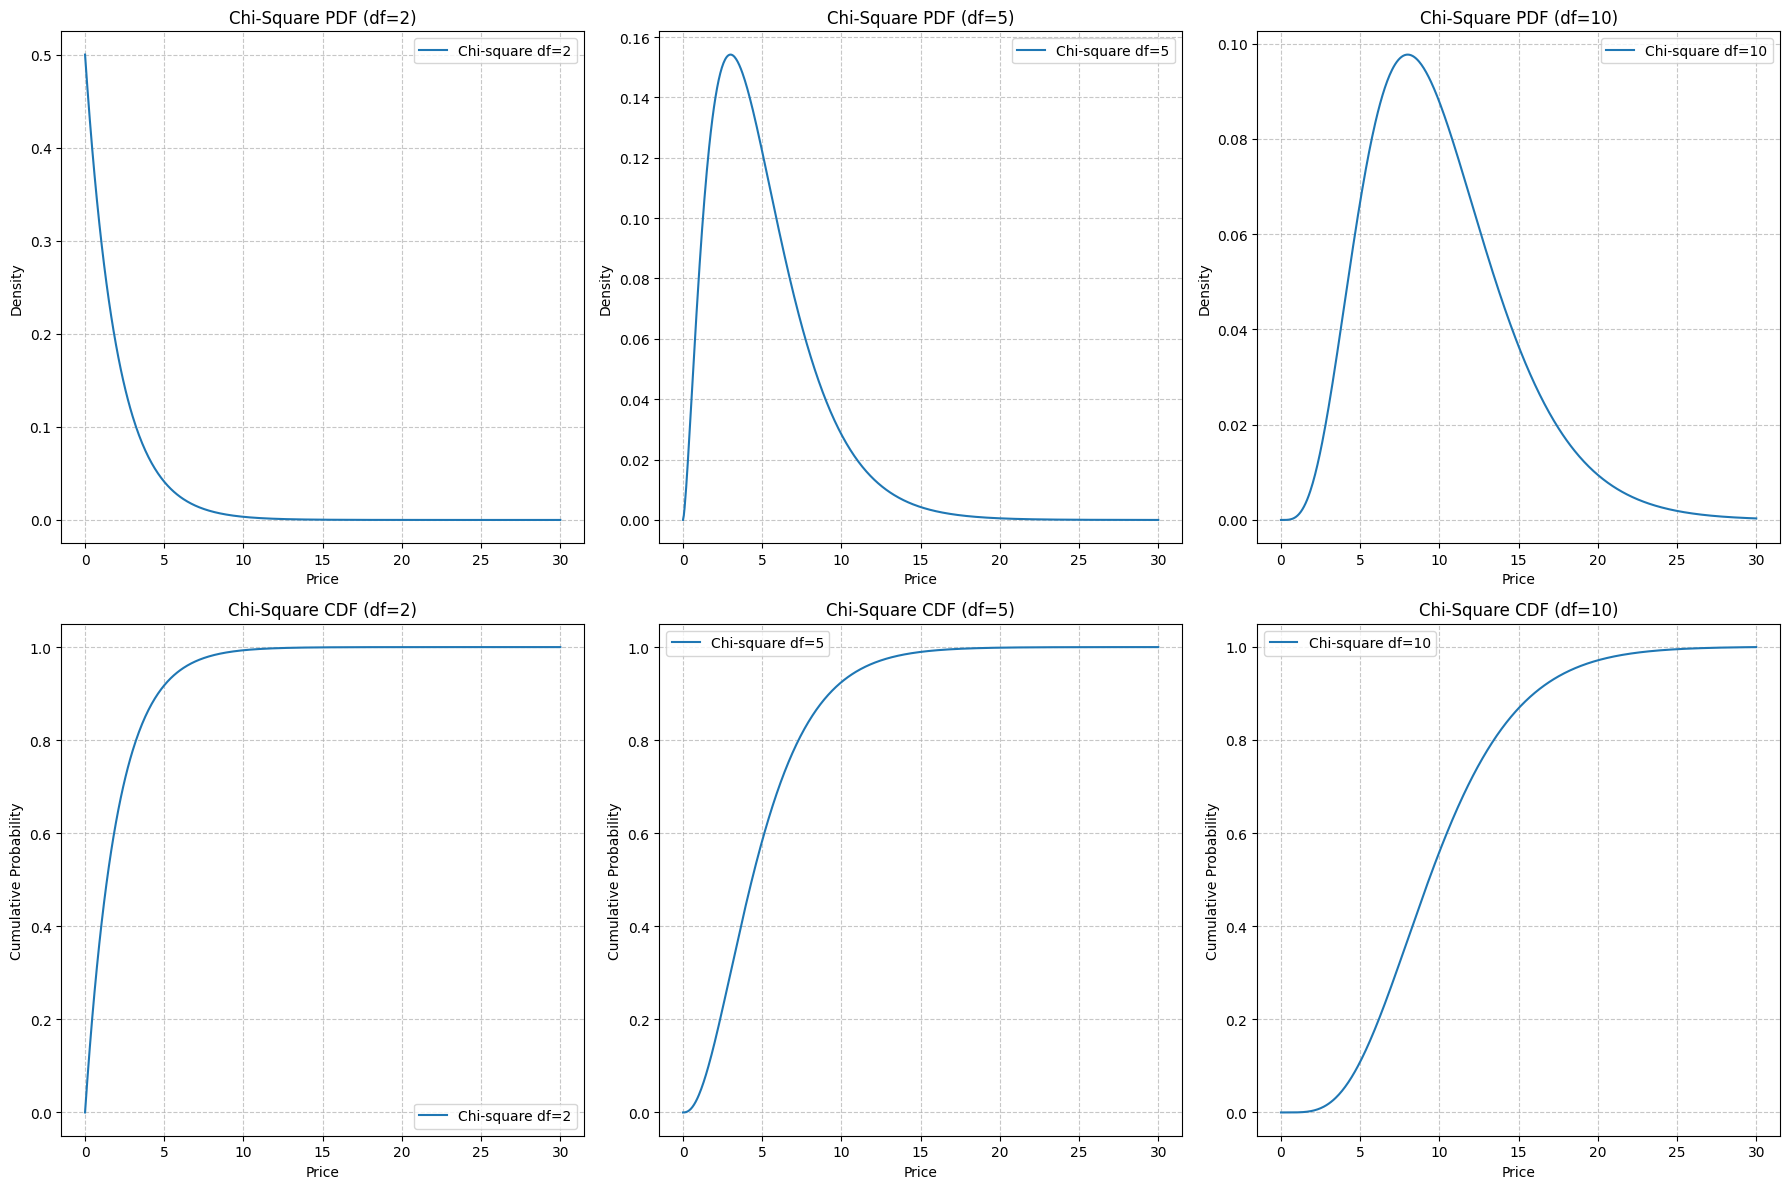

In [1]:
# 在第二个图表中添加网格
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Parameters for chi-square distributions
df_values = [2, 5, 10]  # Degrees of freedom for each distribution
x = np.linspace(0, 30, 600)  # Price range from 0 to 30

# Create subplots for three chi-squared distributions (PDF and CDF)
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, df in enumerate(df_values):
    # Chi-square PDF for each degree of freedom
    y_pdf = chi2.pdf(x, df)

    # Chi-square CDF for each degree of freedom
    y_cdf = chi2.cdf(x, df)

    # Plot PDF
    axs[0, i].plot(x, y_pdf, label=f"Chi-square df={df}")
    axs[0, i].set_title(f"Chi-Square PDF (df={df})")
    axs[0, i].set_xlabel("Price")
    axs[0, i].set_ylabel("Density")
    axs[0, i].legend()
    axs[0, i].grid(True, linestyle="--", alpha=0.7)  # 添加网格线

    # Plot CDF
    axs[1, i].plot(x, y_cdf, label=f"Chi-square df={df}")
    axs[1, i].set_title(f"Chi-Square CDF (df={df})")
    axs[1, i].set_xlabel("Price")
    axs[1, i].set_ylabel("Cumulative Probability")
    axs[1, i].legend()
    axs[1, i].grid(True, linestyle="--", alpha=0.7)  # 添加网格线

plt.tight_layout()
plt.show()

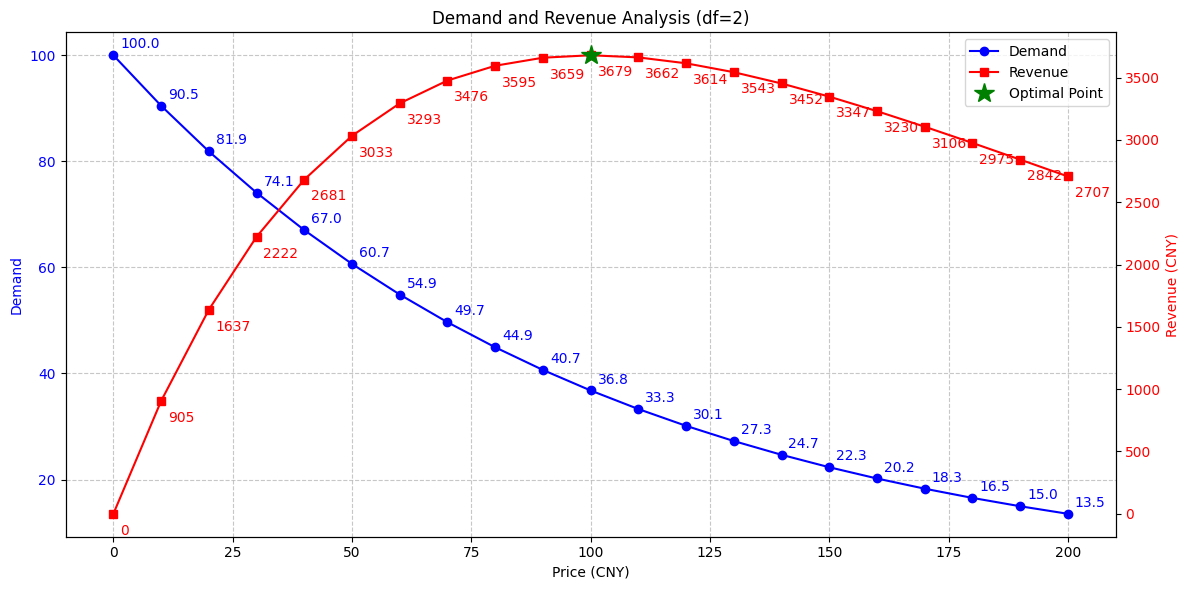


Price-Demand-Revenue Analysis:
Price:   0 CNY -> Demand: 100.0 -> Revenue:       0 CNY
Price:  10 CNY -> Demand:  90.5 -> Revenue:     905 CNY
Price:  20 CNY -> Demand:  81.9 -> Revenue:    1637 CNY
Price:  30 CNY -> Demand:  74.1 -> Revenue:    2222 CNY
Price:  40 CNY -> Demand:  67.0 -> Revenue:    2681 CNY
Price:  50 CNY -> Demand:  60.7 -> Revenue:    3033 CNY
Price:  60 CNY -> Demand:  54.9 -> Revenue:    3293 CNY
Price:  70 CNY -> Demand:  49.7 -> Revenue:    3476 CNY
Price:  80 CNY -> Demand:  44.9 -> Revenue:    3595 CNY
Price:  90 CNY -> Demand:  40.7 -> Revenue:    3659 CNY
Price: 100 CNY -> Demand:  36.8 -> Revenue:    3679 CNY
Price: 110 CNY -> Demand:  33.3 -> Revenue:    3662 CNY
Price: 120 CNY -> Demand:  30.1 -> Revenue:    3614 CNY
Price: 130 CNY -> Demand:  27.3 -> Revenue:    3543 CNY
Price: 140 CNY -> Demand:  24.7 -> Revenue:    3452 CNY
Price: 150 CNY -> Demand:  22.3 -> Revenue:    3347 CNY
Price: 160 CNY -> Demand:  20.2 -> Revenue:    3230 CNY
Price: 170 CNY -

In [2]:
def analyze_pricing(df, price_list, wtp_threshold, total_demand):
    """
    Analyze pricing strategy and generate demand & revenue curves

    Parameters:
    df (int): Degrees of freedom
    price_list (array-like): List of prices
    total_demand (float): Total demand

    Returns:
    tuple: (optimal_price, optimal_demand, max_revenue)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    # Convert price list to numpy array
    prices = np.array(price_list)
    threshold = prices / wtp_threshold * df

    # Calculate demand probability and revenue
    probability = 1 - chi2.cdf(threshold, df)
    demand = probability * total_demand
    revenue = prices * demand

    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot demand curve (left y-axis)
    ax1.set_xlabel("Price (CNY)")
    ax1.set_ylabel("Demand", color="b")
    line1 = ax1.plot(prices, demand, "bo-", label="Demand")  # 使用简单的格式字符串
    ax1.tick_params(axis="y", labelcolor="b")

    # Plot revenue curve (right y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel("Revenue (CNY)", color="r")
    line2 = ax2.plot(prices, revenue, "rs-", label="Revenue")  # 使用简单的格式字符串
    ax2.tick_params(axis="y", labelcolor="r")

    # Add grid
    ax1.grid(True, linestyle="--", alpha=0.7)

    # Find optimal pricing point
    optimal_index = np.argmax(revenue)
    optimal_price = prices[optimal_index]
    optimal_revenue = revenue[optimal_index]
    optimal_demand = demand[optimal_index]

    # Mark optimal point
    ax2.plot(optimal_price, optimal_revenue, "g*", markersize=15, label="Optimal Point")

    # Add data labels
    for price, d, r in zip(prices, demand, revenue):
        ax1.annotate(
            f"{d:.1f}",
            xy=(price, d),
            xytext=(5, 5),
            textcoords="offset points",
            color="b",
        )
        ax2.annotate(
            f"{r:.0f}",
            xy=(price, r),
            xytext=(5, -15),
            textcoords="offset points",
            color="r",
        )

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

    plt.title(f"Demand and Revenue Analysis (df={df})")
    plt.tight_layout()
    plt.show()

    # Print analysis results
    print("\nPrice-Demand-Revenue Analysis:")
    for price, d, r in zip(prices, demand, revenue):
        print(f"Price: {price:>3d} CNY -> Demand: {d:>5.1f} -> Revenue: {r:>7.0f} CNY")

    print(f"\nOptimal Pricing Strategy:")
    print(f"Recommended Price: {optimal_price} CNY")
    print(f"Expected Demand: {optimal_demand:.1f}")
    print(f"Maximum Revenue: {optimal_revenue:.0f} CNY")

    return optimal_price, optimal_demand, optimal_revenue


# Usage example
if __name__ == "__main__":
    optimal_price, optimal_demand, optimal_revenue = analyze_pricing(
        df=2,
        price_list=[
            0,
            10,
            20,
            30,
            40,
            50,
            60,
            70,
            80,
            90,
            100,
            110,
            120,
            130,
            140,
            150,
            160,
            170,
            180,
            190,
            200,
        ],
        wtp_threshold=100,
        total_demand=100,
    )

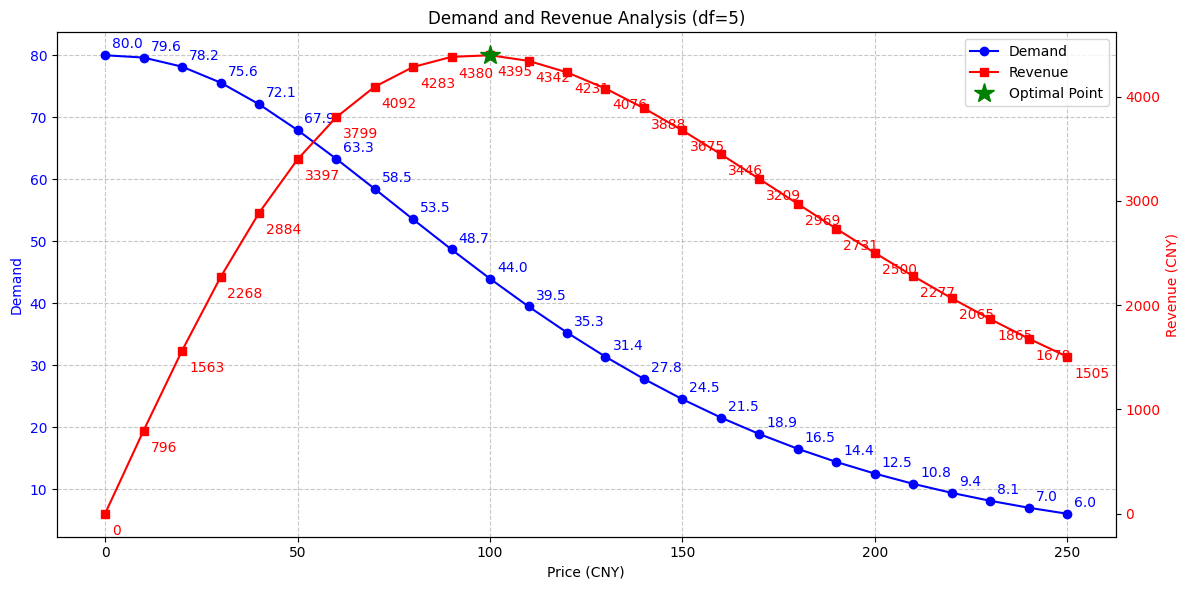


Price-Demand-Revenue Analysis:
Price:   0 CNY -> Demand:  80.0 -> Revenue:       0 CNY
Price:  10 CNY -> Demand:  79.6 -> Revenue:     796 CNY
Price:  20 CNY -> Demand:  78.2 -> Revenue:    1563 CNY
Price:  30 CNY -> Demand:  75.6 -> Revenue:    2268 CNY
Price:  40 CNY -> Demand:  72.1 -> Revenue:    2884 CNY
Price:  50 CNY -> Demand:  67.9 -> Revenue:    3397 CNY
Price:  60 CNY -> Demand:  63.3 -> Revenue:    3799 CNY
Price:  70 CNY -> Demand:  58.5 -> Revenue:    4092 CNY
Price:  80 CNY -> Demand:  53.5 -> Revenue:    4283 CNY
Price:  90 CNY -> Demand:  48.7 -> Revenue:    4380 CNY
Price: 100 CNY -> Demand:  44.0 -> Revenue:    4395 CNY
Price: 110 CNY -> Demand:  39.5 -> Revenue:    4342 CNY
Price: 120 CNY -> Demand:  35.3 -> Revenue:    4231 CNY
Price: 130 CNY -> Demand:  31.4 -> Revenue:    4076 CNY
Price: 140 CNY -> Demand:  27.8 -> Revenue:    3888 CNY
Price: 150 CNY -> Demand:  24.5 -> Revenue:    3675 CNY
Price: 160 CNY -> Demand:  21.5 -> Revenue:    3446 CNY
Price: 170 CNY -

In [3]:
 optimal_price, optimal_demand, optimal_revenue = analyze_pricing(
        df=5,
        price_list=[
            0,
            10,
            20,
            30,
            40,
            50,
            60,
            70,
            80,
            90,
            100,
            110,
            120,
            130,
            140,
            150,
            160,
            170,
            180,
            190,
            200,
            210,
            220,
            230,
            240,
            250,
        ],
        wtp_threshold=125,
        total_demand=80,
    )


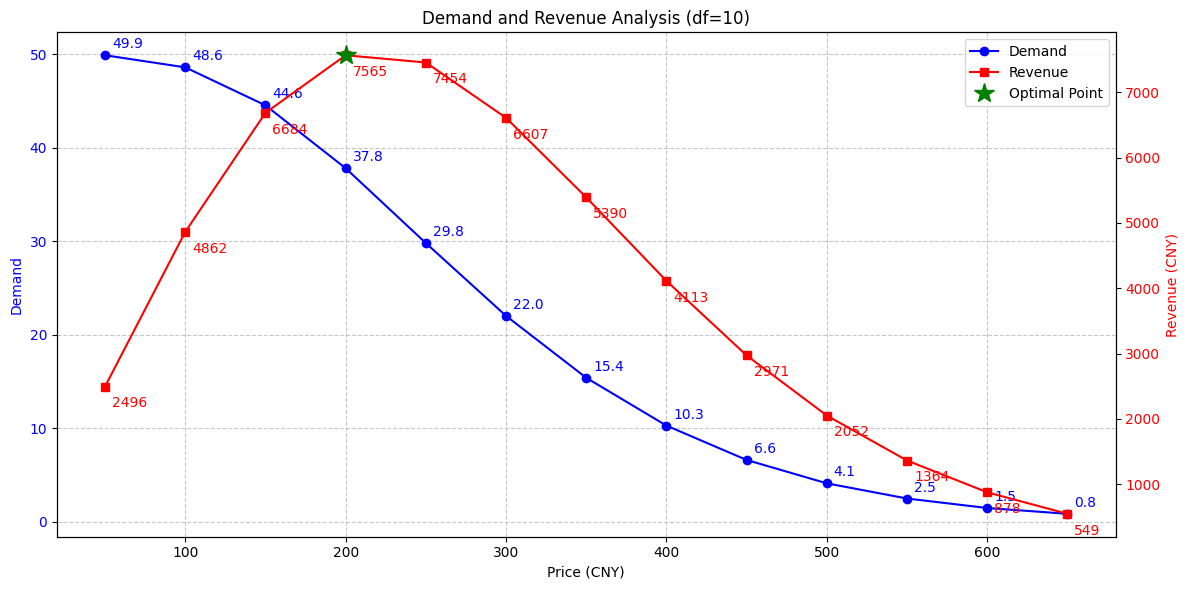


Price-Demand-Revenue Analysis:
Price:  50 CNY -> Demand:  49.9 -> Revenue:    2496 CNY
Price: 100 CNY -> Demand:  48.6 -> Revenue:    4862 CNY
Price: 150 CNY -> Demand:  44.6 -> Revenue:    6684 CNY
Price: 200 CNY -> Demand:  37.8 -> Revenue:    7565 CNY
Price: 250 CNY -> Demand:  29.8 -> Revenue:    7454 CNY
Price: 300 CNY -> Demand:  22.0 -> Revenue:    6607 CNY
Price: 350 CNY -> Demand:  15.4 -> Revenue:    5390 CNY
Price: 400 CNY -> Demand:  10.3 -> Revenue:    4113 CNY
Price: 450 CNY -> Demand:   6.6 -> Revenue:    2971 CNY
Price: 500 CNY -> Demand:   4.1 -> Revenue:    2052 CNY
Price: 550 CNY -> Demand:   2.5 -> Revenue:    1364 CNY
Price: 600 CNY -> Demand:   1.5 -> Revenue:     878 CNY
Price: 650 CNY -> Demand:   0.8 -> Revenue:     549 CNY

Optimal Pricing Strategy:
Recommended Price: 200 CNY
Expected Demand: 37.8
Maximum Revenue: 7565 CNY


In [4]:
 optimal_price, optimal_demand, optimal_revenue = analyze_pricing(
        df=10,
        price_list=[50,100,
         150,
         200,
         250,
         300,
         350,
         400,
         450,
         500,
         550,
         600,
         650
        ],
        wtp_threshold=300,
        total_demand=50,
    )


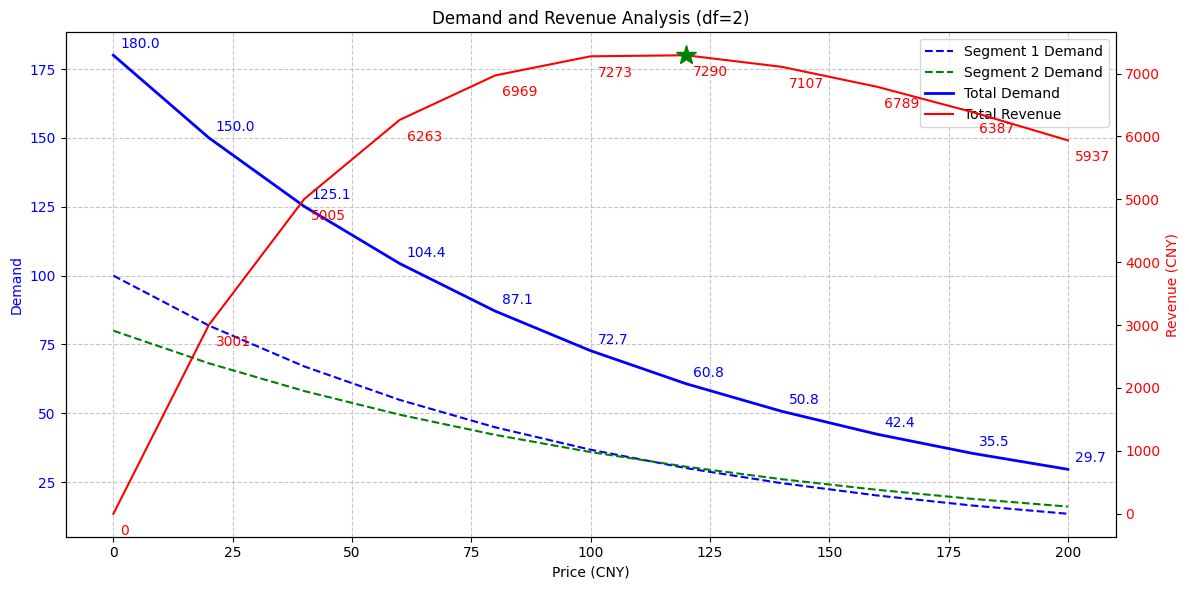


Price-Demand-Revenue Analysis:
Price:   0 CNY -> Segment1: 100.0, Segment2:  80.0, Total Demand: 180.0 -> Revenue:       0 CNY
Price:  20 CNY -> Segment1:  81.9, Segment2:  68.2, Total Demand: 150.0 -> Revenue:    3001 CNY
Price:  40 CNY -> Segment1:  67.0, Segment2:  58.1, Total Demand: 125.1 -> Revenue:    5005 CNY
Price:  60 CNY -> Segment1:  54.9, Segment2:  49.5, Total Demand: 104.4 -> Revenue:    6263 CNY
Price:  80 CNY -> Segment1:  44.9, Segment2:  42.2, Total Demand:  87.1 -> Revenue:    6969 CNY
Price: 100 CNY -> Segment1:  36.8, Segment2:  35.9, Total Demand:  72.7 -> Revenue:    7273 CNY
Price: 120 CNY -> Segment1:  30.1, Segment2:  30.6, Total Demand:  60.8 -> Revenue:    7290 CNY
Price: 140 CNY -> Segment1:  24.7, Segment2:  26.1, Total Demand:  50.8 -> Revenue:    7107 CNY
Price: 160 CNY -> Segment1:  20.2, Segment2:  22.2, Total Demand:  42.4 -> Revenue:    6789 CNY
Price: 180 CNY -> Segment1:  16.5, Segment2:  19.0, Total Demand:  35.5 -> Revenue:    6387 CNY
Price: 2

In [5]:
def analyze_pricing_segments(df, price_list, wtp_thresholds, total_demands):
    """
    Analyze pricing strategy for multiple market segments

    Parameters:
    df (int): Degrees of freedom
    price_list (array-like): List of prices
    wtp_thresholds (list): List of WTP thresholds for each segment
    total_demands (list): List of total demands for each segment
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    # Convert price list to numpy array
    prices = np.array(price_list)

    # Calculate demand for each segment
    demands = []
    for wtp, td in zip(wtp_thresholds, total_demands):
        threshold = prices / wtp * df
        probability = 1 - chi2.cdf(threshold, df)
        demand = probability * td
        demands.append(demand)

    # Calculate total demand and revenue
    total_demand = np.sum(demands, axis=0)
    total_revenue = prices * total_demand

    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot demand curves (left y-axis)
    ax1.set_xlabel("Price (CNY)")
    ax1.set_ylabel("Demand", color="b")

    # Plot individual segment demands
    line1 = ax1.plot(prices, demands[0], "b--", label="Segment 1 Demand")
    line2 = ax1.plot(prices, demands[1], "g--", label="Segment 2 Demand")

    # Plot total demand
    line3 = ax1.plot(prices, total_demand, "b-", linewidth=2, label="Total Demand")
    ax1.tick_params(axis="y", labelcolor="b")

    # Plot revenue curve (right y-axis)
    ax2 = ax1.twinx()
    ax2.set_ylabel("Revenue (CNY)", color="r")
    line4 = ax2.plot(prices, total_revenue, "r-", label="Total Revenue")
    ax2.tick_params(axis="y", labelcolor="r")

    # Add grid
    ax1.grid(True, linestyle="--", alpha=0.7)

    # Find optimal pricing point
    optimal_index = np.argmax(total_revenue)
    optimal_price = prices[optimal_index]
    optimal_revenue = total_revenue[optimal_index]
    optimal_demand = total_demand[optimal_index]

    # Mark optimal point
    ax2.plot(optimal_price, optimal_revenue, "g*", markersize=15, label="Optimal Point")

    # Add data labels
    for price, d1, d2, td, r in zip(
        prices, demands[0], demands[1], total_demand, total_revenue
    ):
        ax1.annotate(
            f"{td:.1f}",
            xy=(price, td),
            xytext=(5, 5),
            textcoords="offset points",
            color="b",
        )
        ax2.annotate(
            f"{r:.0f}",
            xy=(price, r),
            xytext=(5, -15),
            textcoords="offset points",
            color="r",
        )

    # Combine legends
    lines = line1 + line2 + line3 + line4
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="upper right")

    plt.title(f"Demand and Revenue Analysis (df={df})")
    plt.tight_layout()
    plt.show()

    # Print analysis results
    print("\nPrice-Demand-Revenue Analysis:")
    for price, d1, d2, td, r in zip(
        prices, demands[0], demands[1], total_demand, total_revenue
    ):
        print(
            f"Price: {price:>3d} CNY -> Segment1: {d1:>5.1f}, Segment2: {d2:>5.1f}, Total Demand: {td:>5.1f} -> Revenue: {r:>7.0f} CNY"
        )

    print(f"\nOptimal Pricing Strategy:")
    print(f"Recommended Price: {optimal_price} CNY")
    print(f"Expected Total Demand: {optimal_demand:.1f}")
    print(f"Maximum Revenue: {optimal_revenue:.0f} CNY")

    return optimal_price, optimal_demand, optimal_revenue


# 使用示例
if __name__ == "__main__":
    optimal_price, optimal_demand, optimal_revenue = analyze_pricing_segments(
        df=2,
        price_list=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200],
        wtp_thresholds=[100, 125],  # 两个细分市场的支付意愿阈值
        total_demands=[100, 80],  # 两个细分市场的总需求量
    )

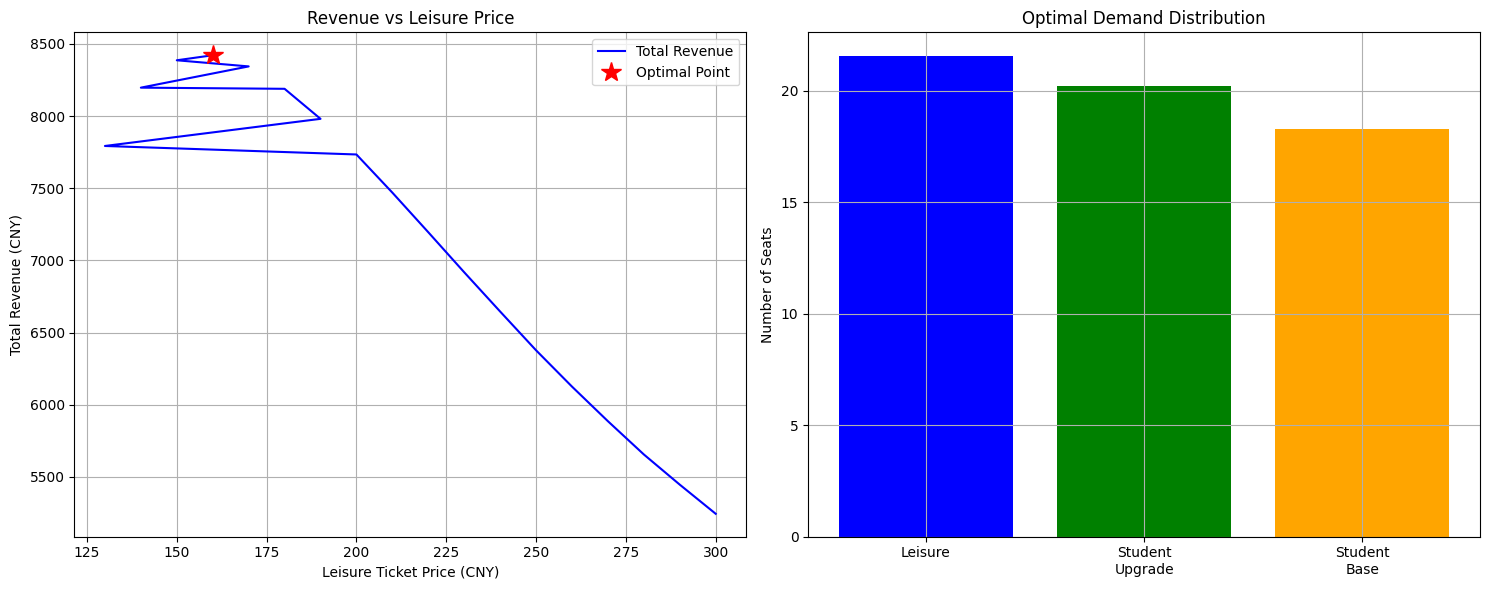


最优定价策略:
Leisure票价: 160 CNY
Student票价: 96 CNY

需求分布:
Leisure需求: 21.5
Student升级: 20.2
Student基础: 18.3
总收入: 8422 CNY

所有定价方案:
Leisure价格  Student价格  Leisure需求  Student升级  Student基础    总收入
---------------------------------------------------------------------------
        130         125        31.4        27.3         1.4        7793
        140         113        27.8        24.7         7.6        8197
        150         104        24.5        22.3        13.2        8387
        160          96        21.5        20.2        18.3        8422
        170          89        18.9        18.3        22.9        8344
        180          83        16.5        16.5        27.0        8189
        190          79        14.4        15.0        30.7        7981
        200          74        12.5        13.5        34.0        7734
        210          71        10.8        12.2        36.9        7470
        220          68         9.4        11.1        39.5        7195
        230        

In [6]:
def analyze_pricing_strategy(df_leisure, df_student, price_list, total_seats):
    """
    分析分层定价策略

    Parameters:
    df_leisure (int): 休闲客户的自由度
    df_student (int): 学生的自由度
    price_list (array-like): 备选价格列表
    total_seats (int): 总座位数
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    wtp_leisure, demand_leisure = 125, 80
    wtp_student, demand_student = 100, 100

    def get_demand(price, df, wtp, demand):
        """计算在给定价格下的需求量"""
        threshold = price / wtp * df
        probability = 1 - chi2.cdf(threshold, df)
        return probability * demand  # 基准需求量设为100

    def find_price_for_demand(target_demand, df, wtp, demand):
        """找到指定需求量对应的价格"""
        prices = np.linspace(0, 500, 5000)  # 创建密集的价格点
        demands = [get_demand(p, df, wtp, demand) for p in prices]
        # 找到最接近目标需求的价格
        idx = np.abs(np.array(demands) - target_demand).argmin()
        return prices[idx]

    results = []

    # 对每个可能的leisure价格进行计算
    for leisure_price in price_list:
        # 1. 计算leisure需求
        leisure_demand = get_demand(
            leisure_price, df_leisure, wtp_leisure, demand_leisure
        )

        # 2. 计算student upgrade数量
        student_upgrade = get_demand(
            leisure_price, df_student, wtp_student, demand_student
        )

        # 3. 计算剩余座位对应的student需求
        remaining_seats = (
            total_seats
            - min(leisure_demand, total_seats)
            - min(student_upgrade, total_seats)
        )
        if remaining_seats <= 0:
            continue

        # 4. 找到对应的student票价
        total_student_demand = student_upgrade + remaining_seats
        student_price = find_price_for_demand(
            total_student_demand, df_student, wtp_student, demand_student
        )

        # 5. 计算总收入
        revenue = (
            leisure_price
            * (min(leisure_demand, total_seats) + min(student_upgrade, total_seats))
            + student_price * remaining_seats
        )

        results.append(
            {
                "leisure_price": leisure_price,
                "student_price": student_price,
                "leisure_demand": min(leisure_demand, total_seats),
                "student_upgrade": min(student_upgrade, total_seats),
                "student_demand": remaining_seats,
                "revenue": revenue,
            }
        )

    # 找到最优结果
    results.sort(key=lambda x: x["revenue"], reverse=True)
    optimal = results[0]

    # 绘图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 绘制收入曲线
    prices = [r["leisure_price"] for r in results]
    revenues = [r["revenue"] for r in results]
    ax1.plot(prices, revenues, "b-", label="Total Revenue")
    ax1.plot(
        optimal["leisure_price"],
        optimal["revenue"],
        "r*",
        markersize=15,
        label="Optimal Point",
    )

    ax1.set_xlabel("Leisure Ticket Price (CNY)")
    ax1.set_ylabel("Total Revenue (CNY)")
    ax1.set_title("Revenue vs Leisure Price")
    ax1.grid(True)
    ax1.legend()

    # 绘制需求分布
    ax2.bar(
        ["Leisure", "Student\nUpgrade", "Student\nBase"],
        [
            optimal["leisure_demand"],
            optimal["student_upgrade"],
            optimal["student_demand"],
        ],
        color=["blue", "green", "orange"],
    )
    ax2.set_ylabel("Number of Seats")
    ax2.set_title("Optimal Demand Distribution")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # 打印结果
    print("\n最优定价策略:")
    print(f"Leisure票价: {optimal['leisure_price']:.0f} CNY")
    print(f"Student票价: {optimal['student_price']:.0f} CNY")
    print(f"\n需求分布:")
    print(f"Leisure需求: {optimal['leisure_demand']:.1f}")
    print(f"Student升级: {optimal['student_upgrade']:.1f}")
    print(f"Student基础: {optimal['student_demand']:.1f}")
    print(f"总收入: {optimal['revenue']:.0f} CNY")
    # 打印所有结果
    print("\n所有定价方案:")
    print("Leisure价格  Student价格  Leisure需求  Student升级  Student基础    总收入")
    print("-" * 75)

    # 按照 leisure_price 升序排序
    sorted_results = sorted(results, key=lambda x: x["leisure_price"])

    for r in sorted_results:
        print(
            f"{r['leisure_price']:>11.0f} {r['student_price']:>11.0f} {r['leisure_demand']:>11.1f} "
            f"{r['student_upgrade']:>11.1f} {r['student_demand']:>11.1f} {r['revenue']:>11.0f}"
        )

    return optimal


# 使用示例
if __name__ == "__main__":
    optimal = analyze_pricing_strategy(
        df_leisure=5,
        df_student=2,
        price_list=np.arange(50, 310, 10),  # 价格范围从50到300，步长为10
        total_seats=60,
    )

In [7]:
def analyze_pricing_strategy(
    df_leisure, df_student, price_list, total_seats, student_price_list
):
    """
    分析分层定价策略

    Parameters:
    df_leisure (int): 休闲客户的自由度
    df_student (int): 学生的自由度
    price_list (array-like): 备选价格列表
    total_seats (int): 总座位数
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    wtp_leisure, demand_leisure = 125, 80
    wtp_student, demand_student = 100, 80
    max_student_base_range = [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
    ]

    def get_demand(price, df, wtp, demand):
        """计算在给定价格下的需求量"""
        threshold = price / wtp * df
        probability = 1 - chi2.cdf(threshold, df)
        return probability * demand  # 基准需求量设为100

    def find_price_for_demand(target_demand, df, wtp, demand):
        """找到指定需求量对应的价格"""
        prices = np.linspace(0, 500, 5000)  # 创建密集的价格点
        demands = [get_demand(p, df, wtp, demand) for p in prices]
        # 找到最接近目标需求的价格
        idx = np.abs(np.array(demands) - target_demand).argmin()
        return prices[idx]

    results = []

    for max_student_base in max_student_base_range:
        for leisure_price in price_list:
            # 1. 计算leisure需求
            leisure_demand = get_demand(
                leisure_price, df_leisure, wtp_leisure, demand_leisure
            )
            actual_leisure = min(
                leisure_demand, total_seats, total_seats - max_student_base
            )
            remaining_seats = total_seats - actual_leisure

            # 2. 计算student upgrade数量
            student_upgrade = get_demand(
                leisure_price, df_student, wtp_student, demand_student
            )

            for student_price in student_price_list:
                # 3. 计算该学生票价下的需求
                student_base_demand = get_demand(
                    student_price, df_student, wtp_student, demand_student
                )
                student_base_seats = min(
                    max_student_base, student_base_demand, remaining_seats
                )
                seats_for_upgrade = remaining_seats - student_base_seats

                # 4. 计算尝试购买的学生数量
                student_base_try_to_purchase = (
                    max_student_base * demand_student / student_base_demand
                )

                # 5. 计算实际升级人数
                actual_student_upgrade = min(
                    (demand_student - student_base_try_to_purchase)
                    * student_upgrade
                    / demand_student,
                    seats_for_upgrade,
                )

                # 6. 计算总收入
                revenue = (
                    leisure_price * (actual_leisure + actual_student_upgrade)
                    + student_price * max_student_base
                )

                # 7. 记录结果
                results.append(
                    {
                        "leisure_price": leisure_price,
                        "student_price": student_price,
                        "leisure_demand": actual_leisure,
                        "actual_student_upgrade": actual_student_upgrade,
                        "max_student_base": max_student_base,
                        "revenue": revenue,
                    }
                )

        # 找到最优结果
    results.sort(key=lambda x: x["revenue"], reverse=True)
    optimal = results[0]

    return optimal, results


# 使用示例
if __name__ == "__main__":
    optimal, results = analyze_pricing_strategy(
        df_leisure=5,
        df_student=2,
        price_list=np.arange(50, 310, 5),  # 价格范围从50到300，步长为10
        total_seats=60,
        student_price_list=np.arange(50, 300, 5),  # 学生票价范围从50到300，步长为10
    )


In [8]:
results

[{'leisure_price': np.int64(115),
  'student_price': np.int64(130),
  'leisure_demand': np.float64(37.329301929226474),
  'actual_student_upgrade': np.float64(5.579759423943445),
  'max_student_base': 17,
  'revenue': np.float64(7144.542055614541)},
 {'leisure_price': np.int64(115),
  'student_price': np.int64(130),
  'leisure_demand': np.float64(37.329301929226474),
  'actual_student_upgrade': np.float64(4.4179251812151605),
  'max_student_base': 18,
  'revenue': np.float64(7140.931117700788)},
 {'leisure_price': np.int64(115),
  'student_price': np.int64(135),
  'leisure_demand': np.float64(37.329301929226474),
  'actual_student_upgrade': np.float64(10.670698070773526),
  'max_student_base': 12,
  'revenue': np.float64(7140.0)},
 {'leisure_price': np.int64(115),
  'student_price': np.int64(130),
  'leisure_demand': np.float64(37.329301929226474),
  'actual_student_upgrade': np.float64(6.6706980707735255),
  'max_student_base': 16,
  'revenue': np.float64(7140.0)},
 {'leisure_price': 

In [9]:
def analyze_pricing_strategy(
    df_leisure, df_student, price_list, total_seats, student_price_list
):
    """
    分析分层定价策略

    Parameters:
    df_leisure (int): 休闲客户的自由度
    df_student (int): 学生的自由度
    price_list (array-like): 备选价格列表
    total_seats (int): 总座位数
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import chi2

    wtp_leisure, demand_leisure = 125, 80
    wtp_student, demand_student = 100, 100
    max_student_base_range = [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
    ]

    def get_demand(price, df, wtp, demand):
        """计算在给定价格下的需求量"""
        threshold = price / wtp * df
        probability = 1 - chi2.cdf(threshold, df)
        return probability * demand  # 基准需求量设为100

    def find_price_for_demand(target_demand, df, wtp, demand):
        """找到指定需求量对应的价格"""
        prices = np.linspace(0, 500, 5000)  # 创建密集的价格点
        demands = [get_demand(p, df, wtp, demand) for p in prices]
        # 找到最接近目标需求的价格
        idx = np.abs(np.array(demands) - target_demand).argmin()
        return prices[idx]

    results = []

    for max_student_base in max_student_base_range:
        for leisure_price in price_list:
            # 1. 计算leisure需求
            leisure_demand = get_demand(
                leisure_price, df_leisure, wtp_leisure, demand_leisure
            )
            actual_leisure = min(
                leisure_demand, total_seats, total_seats - max_student_base
            )
            remaining_seats = total_seats - actual_leisure

            # 2. 计算student upgrade数量
            student_upgrade = get_demand(
                leisure_price, df_student, wtp_student, demand_student
            )

            # 只考虑低于休闲票价的学生票价
            valid_student_prices = [p for p in student_price_list if p < leisure_price]

            for student_price in valid_student_prices:
                # 3. 计算该学生票价下的需求
                student_base_demand = get_demand(
                    student_price, df_student, wtp_student, demand_student
                )
                student_base_seats = min(
                    max_student_base, student_base_demand, remaining_seats
                )
                seats_for_upgrade = remaining_seats - student_base_seats

                # 4. 计算尝试购买的学生数量
                student_base_try_to_purchase = (
                    max_student_base * demand_student / student_base_demand
                )

                # 5. 计算实际升级人数
                actual_student_upgrade = min(
                    (demand_student - student_base_try_to_purchase)
                    * student_upgrade
                    / demand_student,
                    seats_for_upgrade,
                )

                # 6. 计算总收入
                revenue = (
                    leisure_price * (actual_leisure + actual_student_upgrade)
                    + student_price * max_student_base
                )

                # 7. 记录结果
                results.append(
                    {
                        "leisure_price": leisure_price,
                        "student_price": student_price,
                        "leisure_demand": actual_leisure,
                        "actual_student_upgrade": actual_student_upgrade,
                        "max_student_base": max_student_base,
                        "revenue": revenue,
                    }
                )

        # 找到最优结果
    results.sort(key=lambda x: x["revenue"], reverse=True)
    optimal = results[0]

    return optimal, results


In [10]:
optimal, results = analyze_pricing_strategy(
    df_leisure=5,
    df_student=2,
    price_list=np.arange(0, 300, 5),  # 价格范围从50到300，步长为10
    total_seats=60,
    student_price_list=np.arange(0, 300, 5),  # 学生票价范围从50到300，步长为10
)


In [11]:
optimal, results

({'leisure_price': np.int64(130),
  'student_price': np.int64(125),
  'leisure_demand': np.float64(31.35703132797068),
  'actual_student_upgrade': np.float64(0.6187554173812717),
  'max_student_base': 28,
  'revenue': np.float64(7656.852276895754)},
 [{'leisure_price': np.int64(130),
   'student_price': np.int64(125),
   'leisure_demand': np.float64(31.35703132797068),
   'actual_student_upgrade': np.float64(0.6187554173812717),
   'max_student_base': 28,
   'revenue': np.float64(7656.852276895754)},
  {'leisure_price': np.int64(130),
   'student_price': np.int64(125),
   'leisure_demand': np.float64(31.35703132797068),
   'actual_student_upgrade': np.float64(1.5699848418819877),
   'max_student_base': 27,
   'revenue': np.float64(7655.512102080847)},
  {'leisure_price': np.int64(130),
   'student_price': np.int64(125),
   'leisure_demand': np.float64(31.35703132797068),
   'actual_student_upgrade': np.float64(2.5212142663827),
   'max_student_base': 26,
   'revenue': np.float64(7654.1

In [12]:
def analyze_pricing_strategy(
    df_leisure,
    df_student,
    price_list,
    total_seats,
    student_price_list,
    max_student_base_range=None,
):
    import numpy as np
    from scipy.stats import chi2

    # 需求分布参数
    LEISURE_MEAN, LEISURE_STD = 80, 20
    STUDENT_MEAN, STUDENT_STD = 100, 30
    N_SIMULATIONS = 2000  # 模拟次数

    wtp_leisure, wtp_student = 125, 100

    if max_student_base_range is None:
        max_student_base_range = list(range(5, 21))

    def get_demand(price, df, wtp, demand):
        threshold = price / wtp * df
        probability = 1 - chi2.cdf(threshold, df)
        return probability * demand

    results = []

    # 生成50对随机需求
    np.random.seed(42)  # 设置随机种子以确保可重复性
    demand_leisure_samples = np.random.normal(LEISURE_MEAN, LEISURE_STD, N_SIMULATIONS)
    demand_student_samples = np.random.normal(STUDENT_MEAN, STUDENT_STD, N_SIMULATIONS)

    for max_student_base in max_student_base_range:
        for leisure_price in price_list:
            valid_student_prices = [p for p in student_price_list if p < leisure_price]

            for student_price in valid_student_prices:
                scenario_revenues = []  # 存储每次模拟的收入

                # 对每对需求样本进行计算
                for demand_leisure, demand_student in zip(
                    demand_leisure_samples, demand_student_samples
                ):
                    # 确保需求非负
                    demand_leisure = max(0, demand_leisure)
                    demand_student = max(0, demand_student)

                    # 1. 计算leisure需求
                    leisure_demand = get_demand(
                        leisure_price, df_leisure, wtp_leisure, demand_leisure
                    )
                    actual_leisure = min(
                        leisure_demand, total_seats, total_seats - max_student_base
                    )
                    remaining_seats = total_seats - actual_leisure

                    # 2. 计算student upgrade数量
                    student_upgrade = get_demand(
                        leisure_price, df_student, wtp_student, demand_student
                    )

                    # 3. 计算该学生票价下的需求
                    student_base_demand = get_demand(
                        student_price, df_student, wtp_student, demand_student
                    )
                    student_base_seats = min(
                        max_student_base, student_base_demand, remaining_seats
                    )
                    seats_for_upgrade = remaining_seats - student_base_seats

                    # 4. 计算尝试购买的学生数量
                    student_base_try_to_purchase = (
                        max_student_base * demand_student / student_base_demand
                    )

                    # 5. 计算实际升级人数
                    actual_student_upgrade = min(
                        (demand_student - student_base_try_to_purchase)
                        * student_upgrade
                        / demand_student,
                        seats_for_upgrade,
                    )

                    # 6. 计算此次模拟的收入
                    revenue = (
                        leisure_price * (actual_leisure + actual_student_upgrade)
                        + student_price * max_student_base
                    )

                    scenario_revenues.append(revenue)

                # 计算平均收入和标准差
                mean_revenue = np.mean(scenario_revenues)
                std_revenue = np.std(scenario_revenues)

                # 7. 记录结果
                results.append(
                    {
                        "leisure_price": leisure_price,
                        "student_price": student_price,
                        "max_student_base": max_student_base,
                        "mean_revenue": mean_revenue,
                        "std_revenue": std_revenue,
                        "min_revenue": min(scenario_revenues),
                        "max_revenue": max(scenario_revenues),
                    }
                )

    # 按平均收入排序找到最优结果
    results.sort(key=lambda x: x["mean_revenue"], reverse=True)
    optimal = results[0]

    return optimal, results

In [13]:
optimal, results = analyze_pricing_strategy(
    df_leisure=5,
    df_student=2,
    price_list=np.arange(0, 200, 10),  # 价格范围从50到300，步长为10
    total_seats=60,
    student_price_list=np.arange(0, 200, 10),  # 学生票价范围从50到300，步长为10
)


In [14]:
optimal, results

({'leisure_price': np.int64(140),
  'student_price': np.int64(130),
  'max_student_base': 7,
  'mean_revenue': np.float64(7183.6162982725255),
  'std_revenue': np.float64(1101.3889199482282),
  'min_revenue': np.float64(2738.9707796435023),
  'max_revenue': np.float64(8330.0)},
 [{'leisure_price': np.int64(140),
   'student_price': np.int64(130),
   'max_student_base': 7,
   'mean_revenue': np.float64(7183.6162982725255),
   'std_revenue': np.float64(1101.3889199482282),
   'min_revenue': np.float64(2738.9707796435023),
   'max_revenue': np.float64(8330.0)},
  {'leisure_price': np.int64(140),
   'student_price': np.int64(130),
   'max_student_base': 6,
   'mean_revenue': np.float64(7183.613229059463),
   'std_revenue': np.float64(1104.8538205860611),
   'min_revenue': np.float64(2735.6480181685365),
   'max_revenue': np.float64(8340.0)},
  {'leisure_price': np.int64(140),
   'student_price': np.int64(130),
   'max_student_base': 8,
   'mean_revenue': np.float64(7183.578145923521),
   '


最优定价策略:
Business票价: 220 CNY
Leisure票价: 140 CNY
Student票价: 160 CNY
学生票最大数量: 30
Business预留座位: 20

收入统计:
平均收入: 16197 CNY
收入标准差: 1949 CNY
最小收入: 10440 CNY
最大收入: 19020 CNY


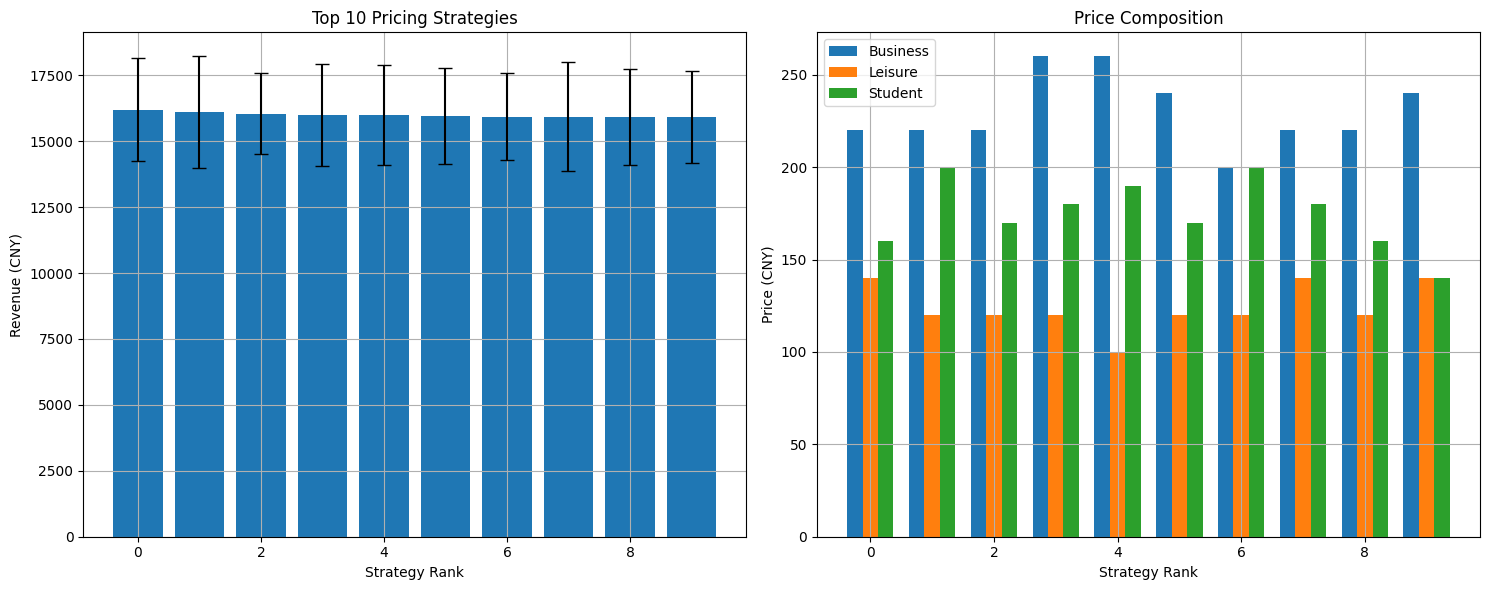

In [15]:
import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
from itertools import product


def simulate_revenue(
    price_business,
    price_leisure,
    price_student,
    seats=100,
    max_student=20,
    rsv_business=30,
    num_simulations=50,
):
    """
    模拟航空定价收入

    Parameters:
    price_business: Business Flex票价
    price_leisure: Weekend Citytrip票价
    price_student: Student票价
    seats: 总座位数
    max_student: 学生票最大数量
    rsv_business: Business预留座位数
    num_simulations: 模拟次数
    """
    revenues = []

    for _ in range(num_simulations):
        # 随机生成各类客户数量
        num_students = max(0, int(np.random.normal(100, 30)))
        num_leisure = max(0, int(np.random.normal(80, 20)))
        num_business = max(0, int(np.random.normal(50, 10)))

        # 生成各类客户的支付意愿
        student_wtp = chi2.rvs(df=2, size=num_students) * 100 / 2  # WTP=100
        leisure_wtp = chi2.rvs(df=5, size=num_leisure) * 125 / 5  # WTP=125
        business_wtp = chi2.rvs(df=10, size=num_business) * 300 / 10  # WTP=300

        # 模拟售票过程
        sold = 0
        revenue = 0
        rsv_bl = seats - max_student

        # 先卖学生票
        for wtp in student_wtp:
            if sold < seats - rsv_bl and wtp >= price_student:
                revenue += price_student
                sold += 1

        # 再卖Leisure票
        for wtp in leisure_wtp:
            if sold < seats - rsv_business:
                if wtp >= price_business:  # 可以买Business票
                    revenue += price_business
                    sold += 1
                elif wtp >= price_leisure:  # 买Leisure票
                    revenue += price_leisure
                    sold += 1

        # 最后卖Business票
        for wtp in business_wtp:
            if sold < seats and wtp >= price_business:
                revenue += price_business
                sold += 1

        revenues.append(revenue)

    return np.mean(revenues), np.std(revenues), np.min(revenues), np.max(revenues)


def optimize_pricing():
    """优化定价策略"""
    price_ranges = {
        "business": np.arange(200, 401, 20),
        "leisure": np.arange(100, 301, 20),
        "student": np.arange(50, 201, 10),
    }

    max_student_range = range(0, 41, 5)  # 0-40, 步长5
    rsv_business_range = range(10, 51, 10)  # 10-50, 步长10

    results = []

    for price_b, price_l, price_s, max_s, rsv_b in product(
        price_ranges["business"],
        price_ranges["leisure"],
        price_ranges["student"],
        max_student_range,
        rsv_business_range,
    ):
        mean_rev, std_rev, min_rev, max_rev = simulate_revenue(
            price_b, price_l, price_s, max_student=max_s, rsv_business=rsv_b
        )

        results.append(
            {
                "business_price": price_b,
                "leisure_price": price_l,
                "student_price": price_s,
                "max_student": max_s,
                "rsv_business": rsv_b,
                "mean_revenue": mean_rev,
                "std_revenue": std_rev,
                "min_revenue": min_rev,
                "max_revenue": max_rev,
            }
        )

    # 按平均收入排序
    results.sort(key=lambda x: x["mean_revenue"], reverse=True)
    optimal = results[0]

    # 打印结果
    print("\n最优定价策略:")
    print(f"Business票价: {optimal['business_price']} CNY")
    print(f"Leisure票价: {optimal['leisure_price']} CNY")
    print(f"Student票价: {optimal['student_price']} CNY")
    print(f"学生票最大数量: {optimal['max_student']}")
    print(f"Business预留座位: {optimal['rsv_business']}")
    print(f"\n收入统计:")
    print(f"平均收入: {optimal['mean_revenue']:.0f} CNY")
    print(f"收入标准差: {optimal['std_revenue']:.0f} CNY")
    print(f"最小收入: {optimal['min_revenue']:.0f} CNY")
    print(f"最大收入: {optimal['max_revenue']:.0f} CNY")

    # 绘制前10个方案的对比图
    top_10 = results[:10]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 收入对比图
    x = range(10)
    revenues = [r["mean_revenue"] for r in top_10]
    std_devs = [r["std_revenue"] for r in top_10]

    ax1.bar(x, revenues, yerr=std_devs, capsize=5)
    ax1.set_xlabel("Strategy Rank")
    ax1.set_ylabel("Revenue (CNY)")
    ax1.set_title("Top 10 Pricing Strategies")
    ax1.grid(True)

    # 价格构成图
    strategies = [f"S{i+1}" for i in range(10)]
    business_prices = [r["business_price"] for r in top_10]
    leisure_prices = [r["leisure_price"] for r in top_10]
    student_prices = [r["student_price"] for r in top_10]

    width = 0.25
    ax2.bar([i - width for i in range(10)], business_prices, width, label="Business")
    ax2.bar(range(10), leisure_prices, width, label="Leisure")
    ax2.bar([i + width for i in range(10)], student_prices, width, label="Student")
    ax2.set_xlabel("Strategy Rank")
    ax2.set_ylabel("Price (CNY)")
    ax2.set_title("Price Composition")
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    return optimal, results


# 运行优化
if __name__ == "__main__":
    optimal, results = optimize_pricing()

In [16]:
def simulate_revenue(
    price_business,
    price_leisure,
    price_student,
    seats=100,
    max_student=20,
    rsv_business=30,
    num_simulations=50,
):
    """
    模拟航空定价收入，允许客户购买更高等级的票
    """
    revenues = []

    for _ in range(num_simulations):
        # 随机生成各类客户数量
        num_students = max(0, int(np.random.normal(100, 30)))
        num_leisure = max(0, int(np.random.normal(80, 20)))
        num_business = max(0, int(np.random.normal(50, 10)))

        # 生成各类客户的支付意愿
        student_wtp = chi2.rvs(df=2, size=num_students) * 100 / 2
        leisure_wtp = chi2.rvs(df=5, size=num_leisure) * 125 / 5
        business_wtp = chi2.rvs(df=10, size=num_business) * 300 / 10

        # 初始化计数器
        sold = 0
        revenue = 0
        student_count = 0
        rsv_bl = seats - max_student

        # 按照支付意愿排序（从高到低）
        student_orders = sorted([(wtp, "student") for wtp in student_wtp], reverse=True)
        leisure_orders = sorted([(wtp, "leisure") for wtp in leisure_wtp], reverse=True)
        business_orders = sorted(
            [(wtp, "business") for wtp in business_wtp], reverse=True
        )

        # 合并所有订单并按支付意愿排序
        all_orders = sorted(
            student_orders + leisure_orders + business_orders,
            key=lambda x: x[0],
            reverse=True,
        )

        # 处理每个订单
        for wtp, customer_type in all_orders:
            if sold >= seats:
                break

            if sold < seats - rsv_business:  # 可以卖任何类型的票
                if (
                    customer_type == "student"
                    and student_count < max_student
                    and wtp >= price_student
                ):
                    revenue += price_student
                    sold += 1
                    student_count += 1
                elif wtp >= price_business:
                    revenue += price_business
                    sold += 1
                elif wtp >= price_leisure and sold < seats - rsv_bl:
                    revenue += price_leisure
                    sold += 1
                elif (
                    customer_type == "student"
                    and wtp >= price_student
                    and student_count < max_student
                ):
                    revenue += price_student
                    sold += 1
                    student_count += 1

            elif sold < seats:  # 只能卖business票
                if wtp >= price_business:
                    revenue += price_business
                    sold += 1

        revenues.append(revenue)

    return np.mean(revenues), np.std(revenues), np.min(revenues), np.max(revenues)


def optimize_pricing():
    """优化定价策略"""
    price_ranges = {
        "business": np.arange(200, 401, 20),
        "leisure": np.arange(100, 301, 20),
        "student": np.arange(50, 201, 10),
    }

    max_student_range = range(0, 41, 5)
    rsv_business_range = range(10, 51, 10)

    results = []

    for price_b, price_l, price_s, max_s, rsv_b in product(
        price_ranges["business"],
        price_ranges["leisure"],
        price_ranges["student"],
        max_student_range,
        rsv_business_range,
    ):
        # 确保价格层级合理
        if price_s > price_l or price_l > price_b:
            continue

        mean_rev, std_rev, min_rev, max_rev = simulate_revenue(
            price_b, price_l, price_s, max_student=max_s, rsv_business=rsv_b
        )

        results.append(
            {
                "business_price": price_b,
                "leisure_price": price_l,
                "student_price": price_s,
                "max_student": max_s,
                "rsv_business": rsv_b,
                "mean_revenue": mean_rev,
                "std_revenue": std_rev,
                "min_revenue": min_rev,
                "max_revenue": max_rev,
            }
        )

    # 按平均收入排序
    results.sort(key=lambda x: x["mean_revenue"], reverse=True)
    optimal = results[0]

    # 打印结果和绘图代码保持不变...

    return optimal, results

In [17]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import scipy.stats as stats
from scipy.stats import chi2

In [18]:
def simulate_revenue(
    price_business,
    price_leisure,
    price_student,
    seats=100,
    max_student=20,
    rsv_business=40,
    num_simulations=50,
):
    """
    模拟航空定价收入，按照客户到达顺序售票
    """
    revenues = []

    for _ in range(num_simulations):
        # 随机生成各类客户数量
        num_students = max(0, int(np.random.normal(100, 30)))
        num_leisure = max(0, int(np.random.normal(80, 20)))
        num_business = max(0, int(np.random.normal(50, 10)))

        # 生成各类客户的支付意愿
        student_wtp = chi2.rvs(df=2, size=num_students) * 100 / 2
        leisure_wtp = chi2.rvs(df=5, size=num_leisure) * 125 / 5
        business_wtp = chi2.rvs(df=10, size=num_business) * 300 / 10

        # 创建所有客户列表，保持随机顺序
        customers = (
            [(wtp, "student") for wtp in student_wtp]
            + [(wtp, "leisure") for wtp in leisure_wtp]
            + [(wtp, "business") for wtp in business_wtp]
        )

        # 初始化计数器
        sold = 0
        revenue = 0
        rsv_bl = seats - max_student
        i = 0
        total_customers = len(customers)

        # 模拟售票过程
        while i < total_customers and sold < seats:
            wtp, customer_type = customers[i]

            # 确定当前可售票种和价格
            if sold < seats - rsv_bl and i < num_students:
                # 可以卖学生票
                current_price = price_student
                if wtp >= current_price:
                    revenue += current_price
                    sold += 1

            elif sold < seats - rsv_business and i < (num_students + num_leisure):
                # 可以卖leisure票
                current_price = price_leisure
                if wtp >= current_price:
                    revenue += current_price
                    sold += 1

            else:
                # 只能卖business票
                current_price = price_business
                if wtp >= current_price:
                    revenue += current_price
                    sold += 1

            i += 1

        revenues.append(revenue)

    return np.mean(revenues), np.std(revenues), np.min(revenues), np.max(revenues)

In [19]:
mean_rev, std_rev, min_rev, max_rev = simulate_revenue(
    price_business=200,
    price_leisure=140,
    price_student=130,
    seats=100,
    max_student=10,
    rsv_business=40,
    num_simulations=10000,
)

In [20]:
mean_rev, std_rev, min_rev, max_rev

(np.float64(14426.231),
 np.float64(1834.4925359998063),
 np.int64(7080),
 np.int64(17800))

开始模拟，共 140400 种组合...
已完成: 100/140400 (0.1%)
已完成: 200/140400 (0.1%)
已完成: 300/140400 (0.2%)
已完成: 400/140400 (0.3%)
已完成: 500/140400 (0.4%)
已完成: 600/140400 (0.4%)
已完成: 700/140400 (0.5%)
已完成: 800/140400 (0.6%)
已完成: 900/140400 (0.6%)
已完成: 1000/140400 (0.7%)
已完成: 1100/140400 (0.8%)
已完成: 1200/140400 (0.9%)
已完成: 1300/140400 (0.9%)
已完成: 1400/140400 (1.0%)
已完成: 1500/140400 (1.1%)
已完成: 1600/140400 (1.1%)
已完成: 1700/140400 (1.2%)
已完成: 1800/140400 (1.3%)
已完成: 1900/140400 (1.4%)
已完成: 2000/140400 (1.4%)
已完成: 2100/140400 (1.5%)
已完成: 2200/140400 (1.6%)
已完成: 2300/140400 (1.6%)
已完成: 2400/140400 (1.7%)
已完成: 2500/140400 (1.8%)
已完成: 2600/140400 (1.9%)
已完成: 2700/140400 (1.9%)
已完成: 2800/140400 (2.0%)
已完成: 2900/140400 (2.1%)
已完成: 3000/140400 (2.1%)
已完成: 3100/140400 (2.2%)
已完成: 3200/140400 (2.3%)
已完成: 3300/140400 (2.4%)
已完成: 3400/140400 (2.4%)
已完成: 3500/140400 (2.5%)
已完成: 3600/140400 (2.6%)
已完成: 3700/140400 (2.6%)
已完成: 3800/140400 (2.7%)
已完成: 3900/140400 (2.8%)
已完成: 4000/140400 (2.8%)
已完成: 4100/140400 (2.9%)
已完成:

/var/folders/4p/y7b04wz17_s19dpcqfp8tt4w0000gn/T/ipykernel_99888/1955937213.py:124: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4p/y7b04wz17_s19dpcqfp8tt4w0000gn/T/ipykernel_99888/1955937213.py:124: UserWarning: Glyph 30053 (\N{CJK UNIFIED IDEOGRAPH-7565}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4p/y7b04wz17_s19dpcqfp8tt4w0000gn/T/ipykernel_99888/1955937213.py:124: UserWarning: Glyph 25490 (\N{CJK UNIFIED IDEOGRAPH-6392}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4p/y7b04wz17_s19dpcqfp8tt4w0000gn/T/ipykernel_99888/1955937213.py:124: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4p/y7b04wz17_s19dpcqfp8tt4w0000gn/T/ipykernel_99888/1955937213.py:124: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/4p

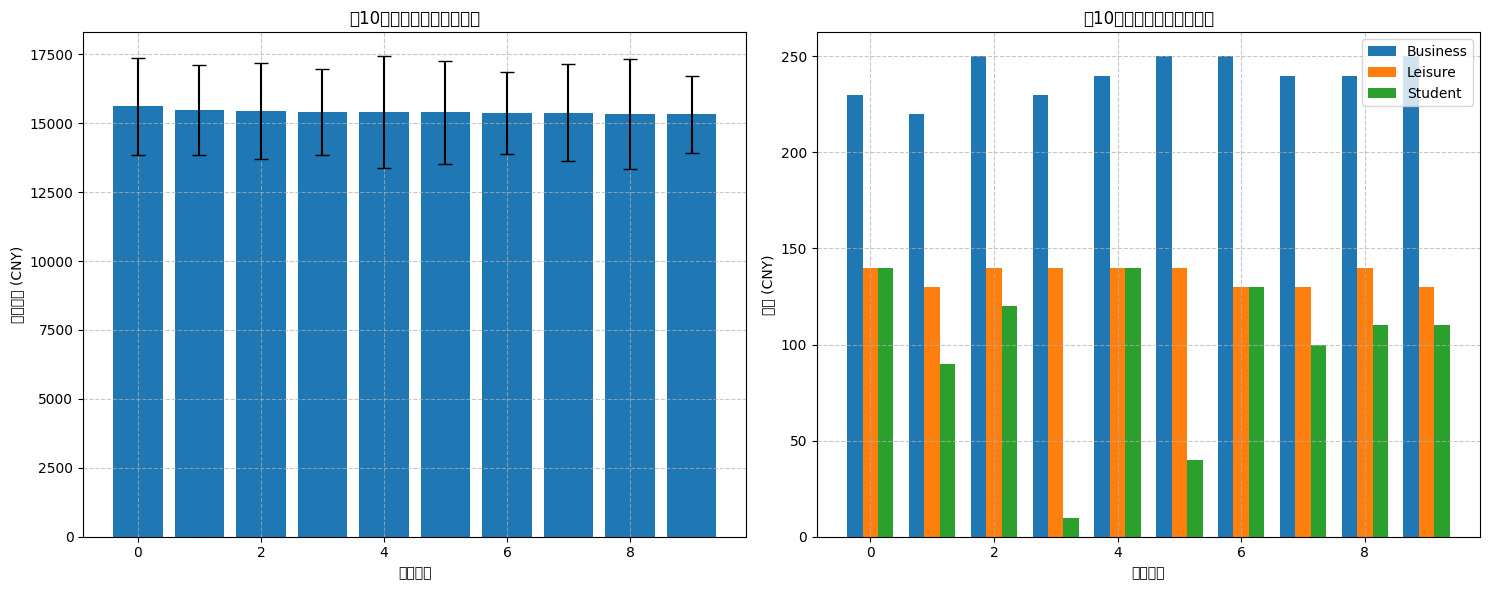

In [22]:
def search_optimal_pricing(num_simulations=50):
    """
    搜索最优定价策略

    Parameters:
    -----------
    num_simulations: int
        每种组合的模拟次数

    Returns:
    --------
    tuple: (optimal_params, all_results)
        optimal_params: dict, 最优参数组合
        all_results: list, 所有模拟结果
    """
    # 定义参数范围
    price_business_range = np.arange(150, 401, 10)  # 150-400, 间隔10
    price_leisure_range = np.arange(100, 160, 10)  # 100-200, 间隔5
    price_student_range = np.arange(0, 150, 10)  # 0-200, 间隔5
    max_student_range = np.arange(0, 30, 5)  # 0-40, 间隔5
    rsv_business_range = np.arange(0, 50, 5)  # 0-60, 间隔5

    results = []
    total_combinations = (
        len(price_business_range)
        * len(price_leisure_range)
        * len(price_student_range)
        * len(max_student_range)
        * len(rsv_business_range)
    )

    print(f"开始模拟，共 {total_combinations} 种组合...")
    processed = 0

    for p_b, p_l, p_s, max_s, rsv_b in itertools.product(
        price_business_range,
        price_leisure_range,
        price_student_range,
        max_student_range,
        rsv_business_range,
    ):
        # 检查价格和座位约束的合理性
        if p_s > p_l or p_l > p_b:  # 确保价格递增
            continue
        if max_s + rsv_b > 100:  # 确保座位分配合理
            continue

        # 运行模拟
        mean_rev, std_rev, min_rev, max_rev = simulate_revenue(
            price_business=p_b,
            price_leisure=p_l,
            price_student=p_s,
            max_student=max_s,
            rsv_business=rsv_b,
            num_simulations=num_simulations,
        )

        results.append(
            {
                "business_price": p_b,
                "leisure_price": p_l,
                "student_price": p_s,
                "max_student": max_s,
                "rsv_business": rsv_b,
                "mean_revenue": mean_rev,
                "std_revenue": std_rev,
                "min_revenue": min_rev,
                "max_revenue": max_rev,
            }
        )

        # 显示进度
        processed += 1
        if processed % 100 == 0:
            print(
                f"已完成: {processed}/{total_combinations} ({processed/total_combinations*100:.1f}%)"
            )

    # 按平均收入排序
    results.sort(key=lambda x: x["mean_revenue"], reverse=True)
    optimal = results[0]

    # 打印最优结果
    print("\n最优定价策略:")
    print(f"Business票价: {optimal['business_price']} CNY")
    print(f"Leisure票价: {optimal['leisure_price']} CNY")
    print(f"Student票价: {optimal['student_price']} CNY")
    print(f"学生票最大数量: {optimal['max_student']}")
    print(f"Business预留座位: {optimal['rsv_business']}")
    print(f"\n收入统计:")
    print(f"平均收入: {optimal['mean_revenue']:.0f} CNY")
    print(f"收入标准差: {optimal['std_revenue']:.0f} CNY")
    print(f"最小收入: {optimal['min_revenue']:.0f} CNY")
    print(f"最大收入: {optimal['max_revenue']:.0f} CNY")

    # 绘制前10个最优方案的对比图
    top_10 = results[:10]

    plt.figure(figsize=(15, 6))

    # 收入对比
    plt.subplot(1, 2, 1)
    revenues = [r["mean_revenue"] for r in top_10]
    std_devs = [r["std_revenue"] for r in top_10]
    plt.bar(range(10), revenues, yerr=std_devs, capsize=5)
    plt.xlabel("策略排名")
    plt.ylabel("平均收入 (CNY)")
    plt.title("前10个最优策略的收入对比")
    plt.grid(True, linestyle="--", alpha=0.7)

    # 价格构成对比
    plt.subplot(1, 2, 2)
    width = 0.25
    x = np.arange(10)
    plt.bar(x - width, [r["business_price"] for r in top_10], width, label="Business")
    plt.bar(x, [r["leisure_price"] for r in top_10], width, label="Leisure")
    plt.bar(x + width, [r["student_price"] for r in top_10], width, label="Student")
    plt.xlabel("策略排名")
    plt.ylabel("票价 (CNY)")
    plt.title("前10个最优策略的价格构成")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

    return optimal, results


# 使用示例
if __name__ == "__main__":
    optimal, all_results = search_optimal_pricing(num_simulations=50)